In this section, we will aim to get the following graph below

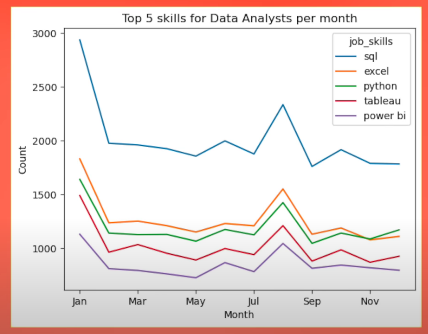

In [2]:
import pandas as pd
from datasets import load_dataset
import ast

import matplotlib.pyplot as plt

#loading data
df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

#data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.describe()
df.info()
df.iloc[0:2]

df_US = df[(df.job_country == 'United States')].copy()

df_US['job_skills'] = df_US['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [3]:
#create a column for month_name
df_US['month_name']=df_US['job_posted_date'].dt.strftime(date_format='%b')

In [4]:
#explode out the job_skills columns
df_skills = df_US.explode(column='job_skills')

In [5]:
#getting the top skills list
number_of_skills = 5

top_skills = df_skills.job_skills.value_counts('job_skills').head(number_of_skills).index.to_list()

In [6]:
top_skills

['sql', 'python', 'r', 'tableau', 'excel']

In [7]:
#getting the top skills
#filter to only the top 5 skills so that we can use pivot table

df_top_skills = df_skills[df_skills.job_skills.isin(top_skills)]

In [8]:
#creating the pivot table
df_pivot = df_top_skills.pivot_table(index = 'month_name', columns ='job_skills', aggfunc='size')

In [9]:
df_pivot

job_skills,excel,python,r,sql,tableau
month_name,,,,,
Apr,4096,9067,4341,9810,4375
Aug,4604,11328,5630,11914,5216
Dec,2608,6684,2815,7129,2913
Feb,4204,9501,4634,10441,4482
Jan,5549,11798,6441,13076,5709
Jul,3515,8595,4144,9026,4085
Jun,3766,8872,4259,9537,4128
Mar,4161,9325,4619,10134,4408
May,3314,8319,3985,8807,3872


In [10]:
#cleaning up the month
df_pivot.reset_index(inplace=True)

#create a helper column to sort the month
df_pivot['month_no'] = pd.to_datetime( df_pivot['month_name'], format = '%b').dt.month
df_pivot.sort_values(by = 'month_no',inplace=True)


In [11]:
df_pivot

job_skills,month_name,excel,python,r,sql,tableau,month_no
4,Jan,5549,11798,6441,13076,5709,1
3,Feb,4204,9501,4634,10441,4482,2
7,Mar,4161,9325,4619,10134,4408,3
0,Apr,4096,9067,4341,9810,4375,4
8,May,3314,8319,3985,8807,3872,5
6,Jun,3766,8872,4259,9537,4128,6
5,Jul,3515,8595,4144,9026,4085,7
1,Aug,4604,11328,5630,11914,5216,8
11,Sep,3366,8138,3501,8637,3567,9
10,Oct,3481,8293,3679,8806,3689,10


In [12]:
#not delete the column we dont need
df_pivot.set_index('month_name', inplace=True)
df_pivot.drop(labels='month_no', axis=1, inplace=True)

### this is a bonus section for how to add custom rows and do aggregationo

In [13]:
df_total = df_pivot.copy()
#using .aggregation and inserting the row total using .loc['new name']
df_total.loc['Total'] = df_pivot.sum()

#doing this for the column 
df_total['Total'] = df_pivot.sum(axis=1)

df_total

job_skills,excel,python,r,sql,tableau,Total
month_name,,,,,,
Jan,5549,11798,6441,13076,5709,42573.0
Feb,4204,9501,4634,10441,4482,33262.0
Mar,4161,9325,4619,10134,4408,32647.0
Apr,4096,9067,4341,9810,4375,31689.0
May,3314,8319,3985,8807,3872,28297.0
Jun,3766,8872,4259,9537,4128,30562.0
Jul,3515,8595,4144,9026,4085,29365.0
Aug,4604,11328,5630,11914,5216,38692.0
Sep,3366,8138,3501,8637,3567,27209.0


### end of bonus section

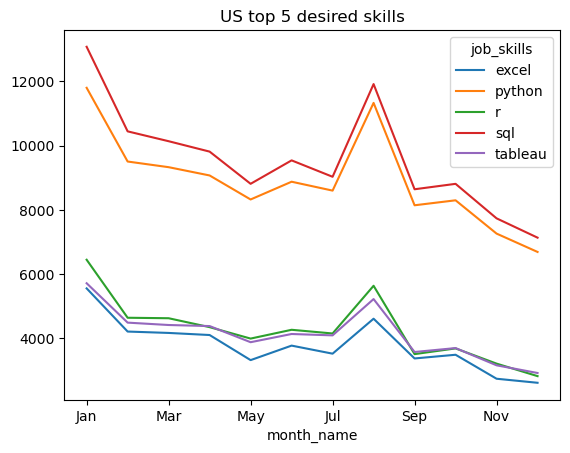

In [14]:
df_pivot.plot(kind = 'line')

#plt.gca().invert_yaxis()
plt.title(f'US top {number_of_skills} desired skills')
plt.ylabel('')
#plt.legend().set_visible(False)
#this always has to go last
plt.show()

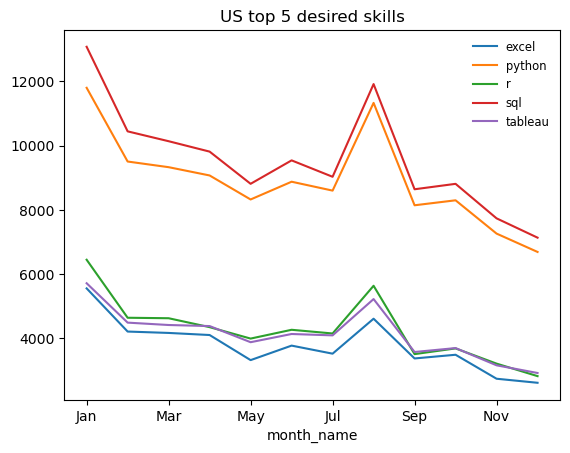

In [15]:
df_pivot.plot(kind='line')

# Optionally invert the y-axis if needed
# plt.gca().invert_yaxis()

# Set plot title and labels
plt.title(f'US top {number_of_skills} desired skills')
plt.ylabel('')

# Modify the legend: remove the box and condense spacing
plt.legend(frameon=False, loc='best', fontsize='small', bbox_to_anchor=(1, 1))  # Adjust loc as needed

# Show the plot
plt.show()


![image.png](attachment:image.png)